# Dacon주최 Covid 데이터 분석 대회 준비

In [1]:
# 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [3]:
# 출력화면을 어지럽히는 warning message 무시

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# Covid19 data 가져오기

In [6]:
region = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Region.csv")
timeprovince = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeProvince.csv")
timegender = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeGender.csv")
timeage = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeAge.csv")
time = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Time.csv")
patientinfo = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientInfo.csv")
patientroute = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientRoute.csv")
case = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Case.csv")
weather = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Weather.csv")

In [7]:
# case 데이터 미리보기
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [8]:
# case 데이터프레임이 몇개의 행과열로 구성되있는지 확인
case.shape

(81, 8)

In [9]:
# case 데이터프레임의 데이터에 대한 정보(데이터타입, 메모리 등) 확인
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         81 non-null     int64 
 1   province        81 non-null     object
 2   city            81 non-null     object
 3   group           81 non-null     bool  
 4   infection_case  81 non-null     object
 5   confirmed       81 non-null     int64 
 6   latitude        81 non-null     object
 7   longitude       81 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [10]:
# case 데이터프레임의 결측치 확인
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [11]:
# case 데이터프레임 칼럼을 '영어' -> '한국어' 로 변환
case.columns = ['환자번호','시도','군구','집단감염여부','집단감염장소','확진자누적수','위도','경도']
case.head()

,환자번호,시도,군구,집단감염여부,집단감염장소,확진자누적수,위도,경도
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [12]:
# '집단감염장소' 칼럼의 값들이 갯수 확인
case['집단감염장소'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Guro-gu Call Center                       3
Cheongdo Daenam Hospital                  3
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Onchun Church                             2
Jung-gu Fashion Company                   1
Haeundae-gu Catholic Church               1
Gyeongsan Seorin Nursing Home             1
Bonghwa Pureun Nursing Home               1
Milal Shelter                             1
Jongno Community Center                   1
Dongan Church                             1
Jin-gu Academy                            1
Changnyeong Coin Karaoke                  1
Eunpyeong St. Mary's Hospital             1
Suwon Saeng Myeong Saem Church            1
Suyeong-gu Kindergarten                   1
Seongdong-gu APT                          1
Bundang Jesaeng Hospital        

In [13]:
# 확진자누적수의 최댓값을 구하면 가장 최근 날짜의 확진자 누적수를 확인 가능
# 따라서 확진자누적수와 집단감염장소로 이루러진 데이터프레임 새로 만듦

df_location = pd.DataFrame(case.groupby(['집단감염장소'])['확진자누적수'].max())
df_location = df_location.sort_values(by=['확진자누적수'], ascending=False).reset_index()
df_location.head()

,집단감염장소,확진자누적수
0,Shincheonji Church,4359
1,etc,1056
2,contact with patient,649
3,Cheongdo Daenam Hospital,119
4,gym facility in Cheonan,104


In [14]:
# ggplot을 이용해 그래프를 그리기 위해 plotnine 라이브러리 import
from plotnine import *

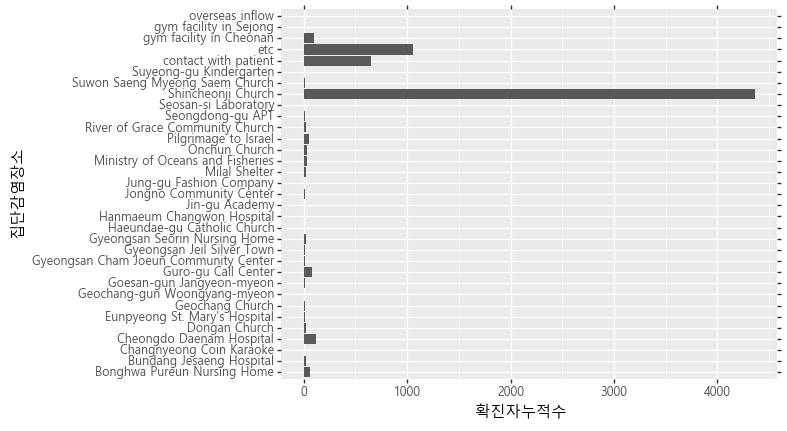

<ggplot: (132562593007)>

In [15]:
(ggplot(df_location)
 +aes(x='집단감염장소', y='확진자누적수')
 +geom_bar(stat='identity', position='dodge')
 +coord_flip()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [17]:
# time 데이터프레임 미리보기
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [18]:
# time 데이터프레임 행,열 구성 살펴보기
time.shape

(61, 7)

In [19]:
# time 데이터프레임 칼럼명 '영어' -> '한국어'로 수정
time.columns = ['날짜', '시간', '검사자누적숫자','음성누적숫자','양성누적숫자','완치자누적숫자','사망자누적숫자']
time.head()

,날짜,시간,검사자누적숫자,음성누적숫자,양성누적숫자,완치자누적숫자,사망자누적숫자
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [20]:
# 날짜와 검사누적숫자로 이루어진 새로운 데이터프레임 만들기
df_test = time.pivot_table(index='날짜', values='검사자누적숫자', aggfunc=np.sum).reset_index()
df_test.head()

,날짜,검사자누적숫자
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,4
3,2020-01-23,22
4,2020-01-24,27


In [21]:
# seaborn으로 그래프를 그리기 위해 라이브러리 import
import seaborn as sns

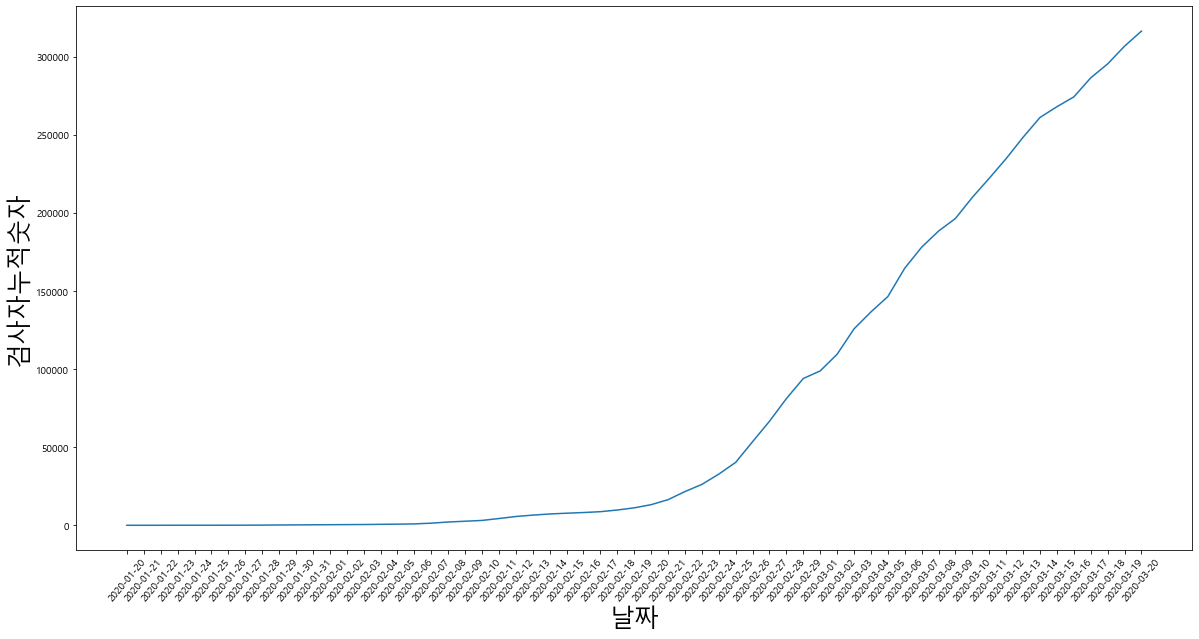

In [22]:
# lineplot을 이용해 시간이 지남에 따라 검사자 누적숫자 추이 그래프 그리기

plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜', fontsize=25)
plt.ylabel('검사자누적숫자', fontsize=25)
sns.lineplot(data=df_test, x='날짜', y='검사자누적숫자')

In [23]:
# 시간이 지남에 따라 검사결과가 음성으로 나온 사람들 수치 추이 그래프 그리기 위해 
# 새로운 데이터프레임 생성

df_neg = time.groupby(['날짜'])['음성누적숫자'].max().reset_index()
df_neg.head()

,날짜,음성누적숫자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,3
3,2020-01-23,21
4,2020-01-24,25


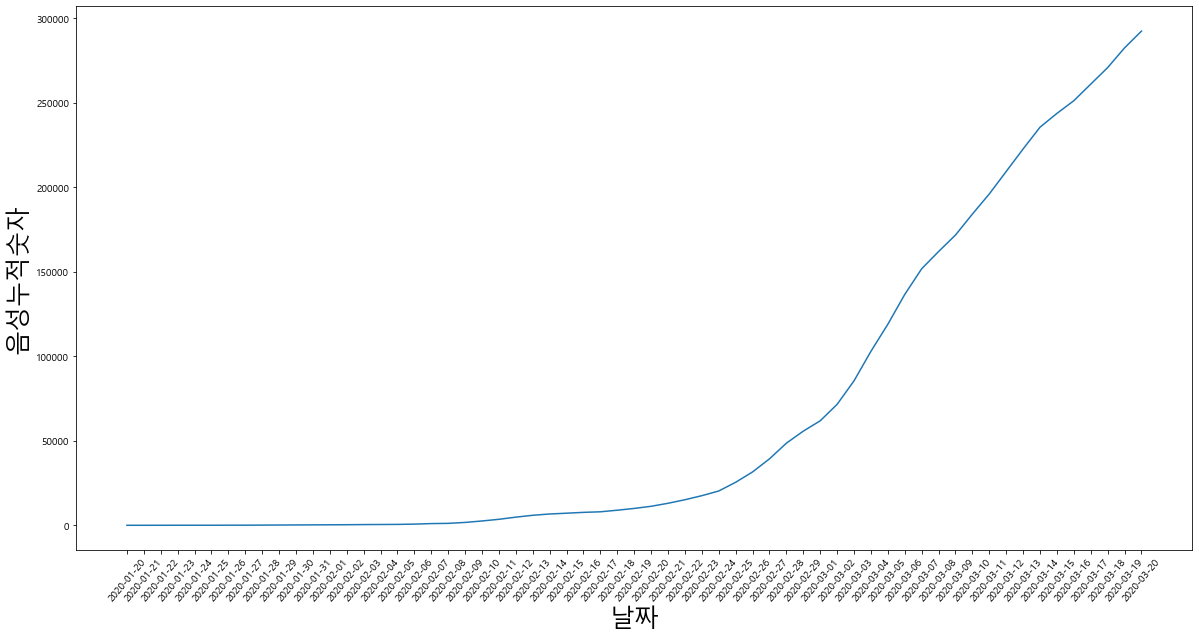

In [24]:
# 시간이 지남에 따라 검사결과가 음성으로 나온 사람들 수치 추이 그래프 그리기

plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('음성누적숫자', fontsize=25)
sns.lineplot(data=df_neg, x='날짜', y='음성누적숫자')

In [25]:
# 시간이 지남에 따라 검사결과가 양성으로 나온 사람들 수치 추이 그래프 그리기 위해 새로운 데이터프레임 생성

df_pos = time.groupby(['날짜'])['양성누적숫자'].max().reset_index()
df_pos.head()

,날짜,양성누적숫자
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


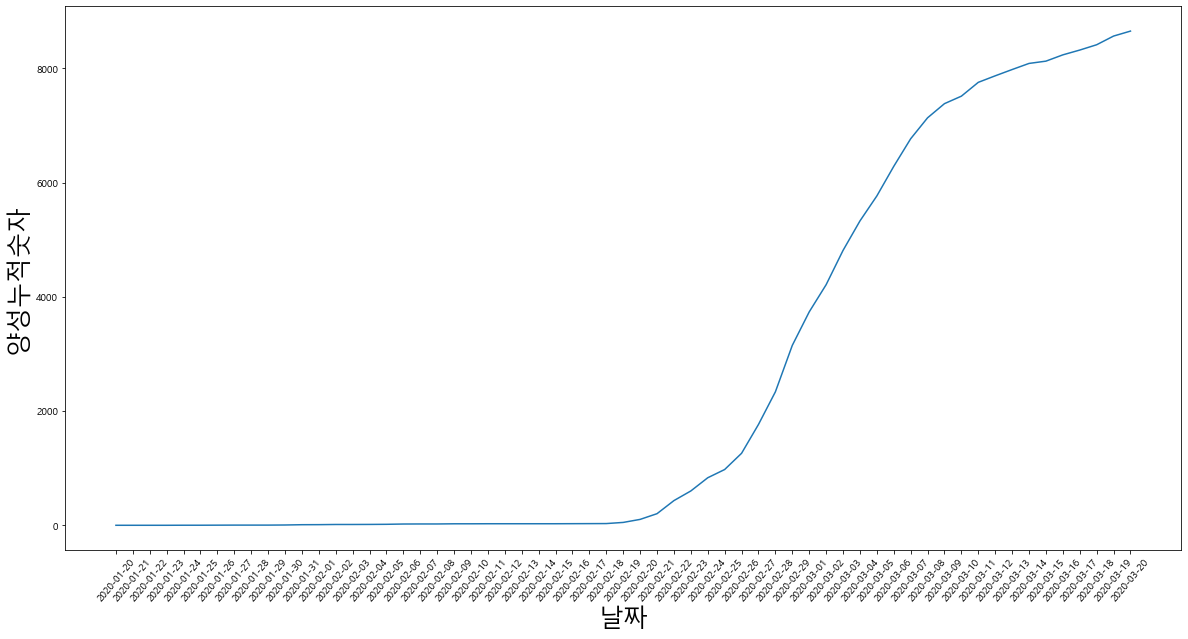

In [26]:
# 시간이 지남에 따라 검사결과가 양성으로 나온 사람들 수치 추이 그래프 그리기

plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('양성누적숫자', fontsize=25)
sns.lineplot(data=df_pos, x='날짜', y='양성누적숫자')

In [27]:
# 시간이 지남에 따라 완치 후 퇴원자 누적숫자 추이 그래프 그리기 위해 새로운 데이터프레임 생성

df_rel = time.groupby(['날짜'])['완치자누적숫자'].max().reset_index()
df_rel.head()

,날짜,완치자누적숫자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0


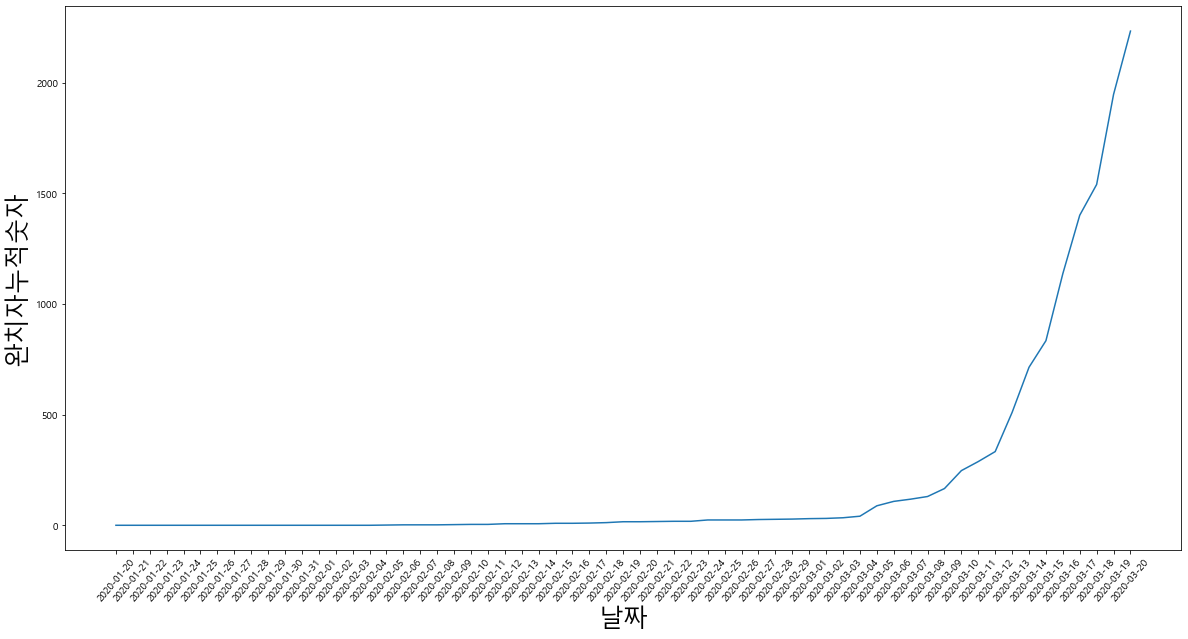

In [28]:
# 시간이 지남에 따라 완치 후 퇴원자 누적숫자 추이 그래프 그리기

plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('완치자성누적숫자', fontsize=25)
sns.lineplot(data=df_rel, x='날짜', y='완치자누적숫자')

In [29]:
# 시간이 지남에 따라 완치 후 사망자 누적숫자 추이 그래프 그리기 위해 새로운 데이터프레임 생성

df_dec = time.groupby(['날짜'])['사망자누적숫자'].max().reset_index()
df_dec.head()

,날짜,사망자누적숫자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0


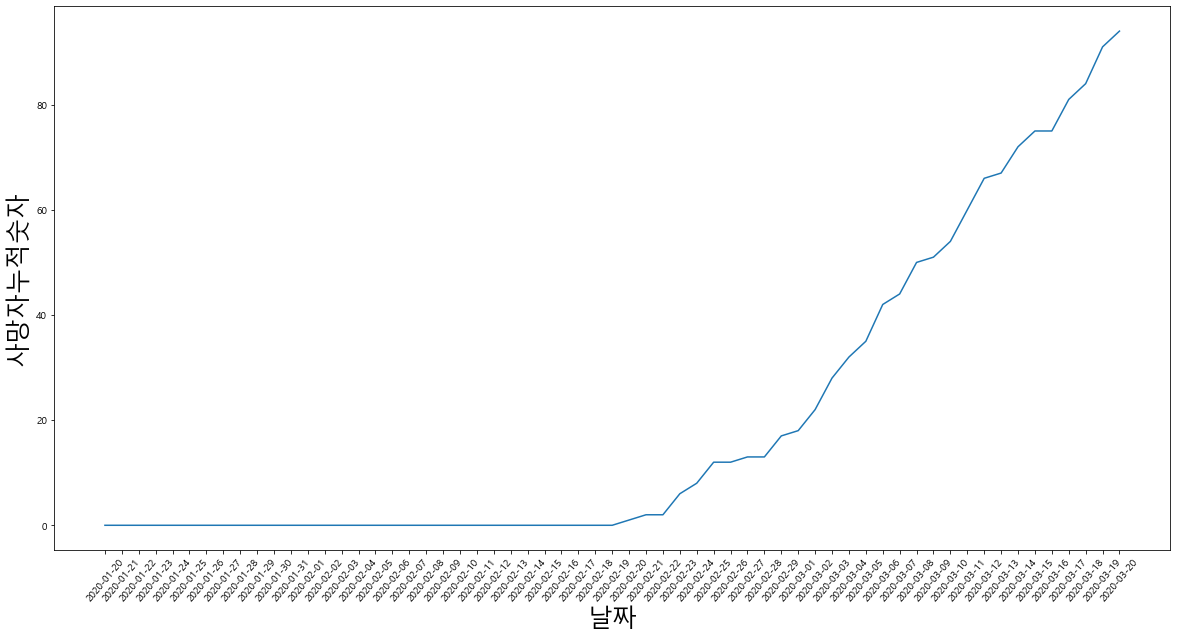

In [30]:
# 시간이 지남에 따라 완치 후 사망자 누적숫자 추이 그래프 그리기 

plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('날짜',fontsize=25)
plt.ylabel('사망자성누적숫자', fontsize=25)
sns.lineplot(data=df_dec, x='날짜', y='사망자누적숫자')

In [32]:
time.head()

,날짜,시간,검사자누적숫자,음성누적숫자,양성누적숫자,완치자누적숫자,사망자누적숫자
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


Text(0.5, 1.0, '시간지남에 따른 Covid19 진단별 누적 숫자')

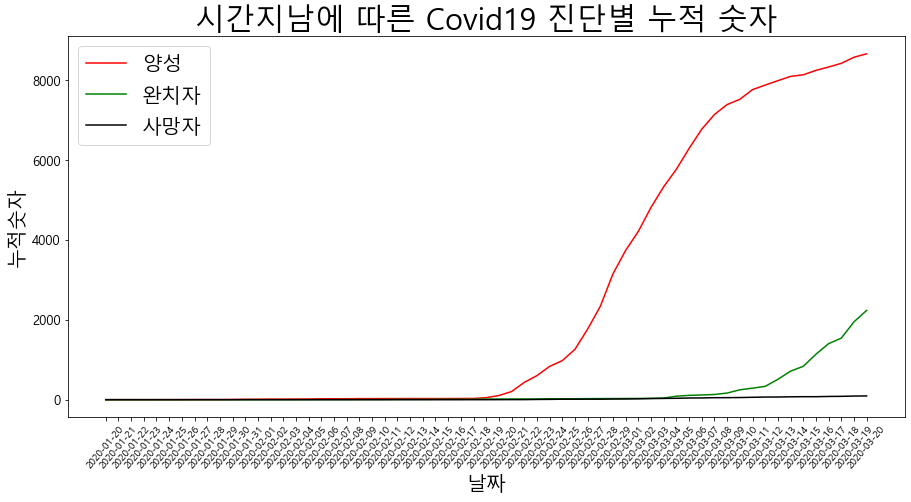

In [34]:
# 시간지남에 따라 양성자, 완치자, 사망자 추이 그래프 한꺼번에 표시

plt.figure(figsize=(15,7))
plt.plot(time['날짜'], time['양성누적숫자'], color='red')
plt.plot(time['날짜'], time['완치자누적숫자'], color='green')
plt.plot(time['날짜'], time['사망자누적숫자'], color='black')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('날짜', fontsize=20)
plt.ylabel('누적숫자', fontsize=20)
plt.legend(['양성','완치자','사망자'], loc='best', fontsize=20)
plt.title('시간지남에 따른 Covid19 진단별 누적 숫자', size=30)


In [35]:
# timeage 칼럼 정보보기

timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       171 non-null    object
 1   time       171 non-null    int64 
 2   age        171 non-null    object
 3   confirmed  171 non-null    int64 
 4   deceased   171 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.8+ KB


In [36]:
# 해당 데이터프레임 결측치 확인
timeage.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [37]:
# 해당 데이터프레임 미리보기
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [14]:
timeage['time'].value_counts() # time칼럼 의미 없음

0    171
Name: time, dtype: int64

In [38]:
# 필요없는 칼럼 'time' 삭제
# 칼럼 이름 '영어' -> '한국어'로 바꾸기

timeage = timeage.drop(['time'], axis=1)
timeage.columns = ['날짜','연령대','확진자누적수','사망자누적수']
timeage.head()

,날짜,연령대,확진자누적수,사망자누적수
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


In [39]:
# 날짜 object로되있는거 datetime형식으로 바꾸기
timeage['날짜'] = pd.to_datetime(timeage['날짜'])

In [40]:
# 바뀌었는지 확인
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      171 non-null    datetime64[ns]
 1   연령대     171 non-null    object        
 2   확진자누적수  171 non-null    int64         
 3   사망자누적수  171 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.5+ KB


In [41]:
# 연령대 value들 종류 보기
timeage['연령대'].unique()

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

In [42]:
# 연령대 칼럼 값 종류들 범위 지정해서 알아보기 쉽게 바꾸기

timeage.loc[timeage['연령대'] == '0s', '연령대'] = '0세이상 10세미만'
timeage.loc[timeage['연령대'] == '10s', '연령대'] = '10세이상 20세미만'
timeage.loc[timeage['연령대'] == '20s', '연령대'] = '20세이상 30세미만'
timeage.loc[timeage['연령대'] == '30s', '연령대'] = '30세이상 40세미만'
timeage.loc[timeage['연령대'] == '40s', '연령대'] = '40세이상 50세미만'
timeage.loc[timeage['연령대'] == '50s', '연령대'] = '50세이상 60세미만'
timeage.loc[timeage['연령대'] == '60s', '연령대'] = '60세이상 70세미만'
timeage.loc[timeage['연령대'] == '70s', '연령대'] = '70세이상 80세미만'
timeage.loc[timeage['연령대'] == '80s', '연령대'] = '80세이상'

# 해당 데이터프레임 바뀌었는지 미리보기
print(timeage.head())
print()
# 제대로 모두 바뀌었는지 '연령대'칼럼 값 종류들 출력
print(timeage['연령대'].unique())

          날짜          연령대  확진자누적수  사망자누적수
0 2020-03-02   0세이상 10세미만      32       0
1 2020-03-02  10세이상 20세미만     169       0
2 2020-03-02  20세이상 30세미만    1235       0
3 2020-03-02  30세이상 40세미만     506       1
4 2020-03-02  40세이상 50세미만     633       1

['0세이상 10세미만' '10세이상 20세미만' '20세이상 30세미만' '30세이상 40세미만' '40세이상 50세미만'
 '50세이상 60세미만' '60세이상 70세미만' '70세이상 80세미만' '80세이상']


In [43]:
# 가장 최근의 날짜의 행들만 갖고와서 연령대별로 확진자누적수 비교하기
# 그러기 위해서 '날짜' 데이터타입 다시 문자열로 바꾸기

timeage['날짜'] = timeage['날짜'].astype(str)
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      171 non-null    object
 1   연령대     171 non-null    object
 2   확진자누적수  171 non-null    int64 
 3   사망자누적수  171 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB


In [44]:
# 가장 최근의 날짜인 2020-03-20일에 해당하는 행들만 갖고오기
age_max = timeage.loc[timeage['날짜'] == '2020-03-20'].reset_index(drop=True)
age_max.head()

,날짜,연령대,확진자누적수,사망자누적수
0,2020-03-20,0세이상 10세미만,97,0
1,2020-03-20,10세이상 20세미만,452,0
2,2020-03-20,20세이상 30세미만,2365,0
3,2020-03-20,30세이상 40세미만,893,1
4,2020-03-20,40세이상 50세미만,1193,1


Text(0, 0.5, '연령대')

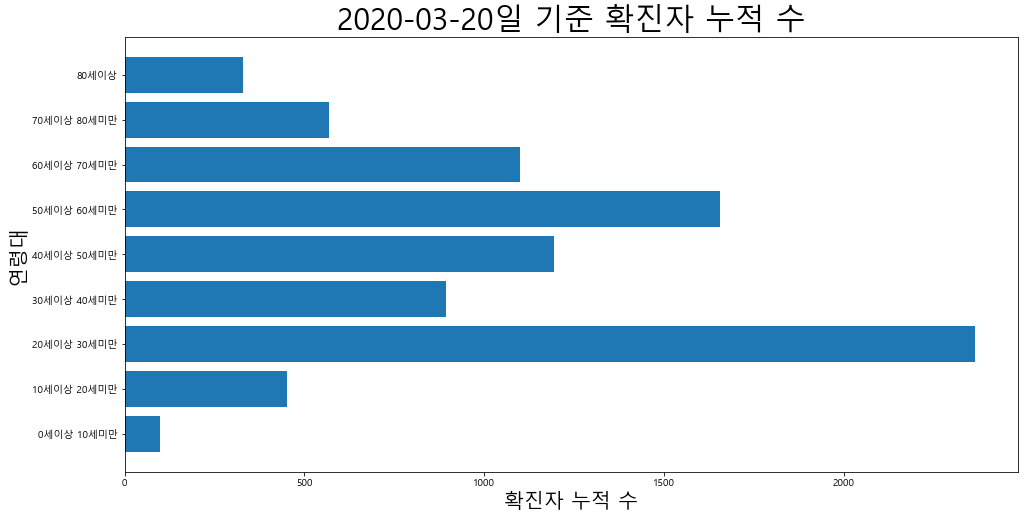

In [45]:
# 2020-03-20(가장 최신날짜)일에 연령대 별로 확진자 누적 수 그래프보기

plt.figure(figsize=(16,8))
plt.barh(age_max['연령대'], age_max['확진자누적수'])
plt.title('2020-03-20일 기준 확진자 누적 수', fontsize=30)
plt.xlabel('확진자 누적 수', fontsize=20)
plt.ylabel('연령대', fontsize=20)

Text(0, 0.5, '연령대')

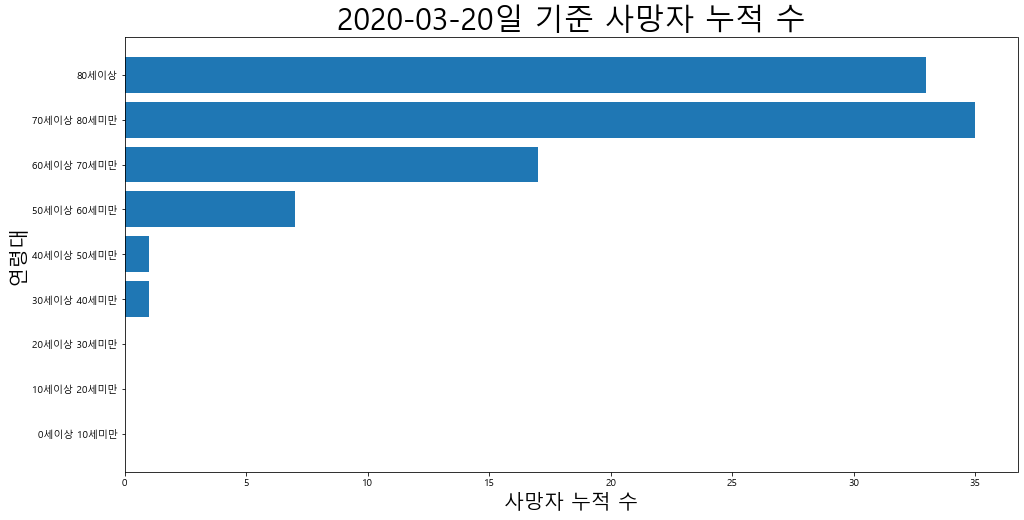

In [46]:
# 2020-03-20(가장 최신날짜)일에 연령대 별로 사망자 누적 수 그래프보기

plt.figure(figsize=(16,8))
plt.barh(age_max['연령대'], age_max['사망자누적수'])
plt.title('2020-03-20일 기준 사망자 누적 수', fontsize=30)
plt.xlabel('사망자 누적 수', fontsize=20)
plt.ylabel('연령대', fontsize=20)

In [47]:
# timeprovince 데이터프레임 행,열 구성 보기
timeprovince.shape

(1037, 6)

In [48]:
# timeprovince 데이터프레임 칼럼 값들의 갯수, 평균, 분산, 최소값, 사분위수, 최댓값보기
timeprovince.describe()

,time,confirmed,released,deceased
count,1037.000000,1037.000000,1037.000000,1037.000000
mean,11.016393,140.442623,11.821601,1.179364
std,7.413121,711.152098,86.507973,6.319566
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,0.000000
75%,16.000000,20.000000,2.000000,0.000000
max,16.000000,6066.000000,1577.000000,67.000000


In [49]:
# 해당 데이터프레임 정보 보기
timeprovince.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1037 non-null   object
 1   time       1037 non-null   int64 
 2   province   1037 non-null   object
 3   confirmed  1037 non-null   int64 
 4   released   1037 non-null   int64 
 5   deceased   1037 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 48.7+ KB


In [50]:
# 해당 데이터프레임 결측치 보기
timeprovince.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

In [51]:
# 해당 데이터프레임 미리보기
timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [52]:
# 가장 최신날짜가 언젠지 보기 위해서 데이터프레임 끝 행들 보기
timeprovince.tail()

,date,time,province,confirmed,released,deceased
1032,2020-03-20,0,Jeollabuk-do,3,7,0
1033,2020-03-20,0,Jeollanam-do,2,3,0
1034,2020-03-20,0,Gyeongsangbuk-do,841,340,22
1035,2020-03-20,0,Gyeongsangnam-do,54,33,0
1036,2020-03-20,0,Jeju-do,2,2,0


In [53]:
# 해당 데이터프레임 칼럼명 한국어로 바꾸기
timeprovince.columns = ['날짜','시간','시도','확진자누적수','완치자누적수','사망자누적수']
timeprovince.head()

,날짜,시간,시도,확진자누적수,완치자누적수,사망자누적수
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


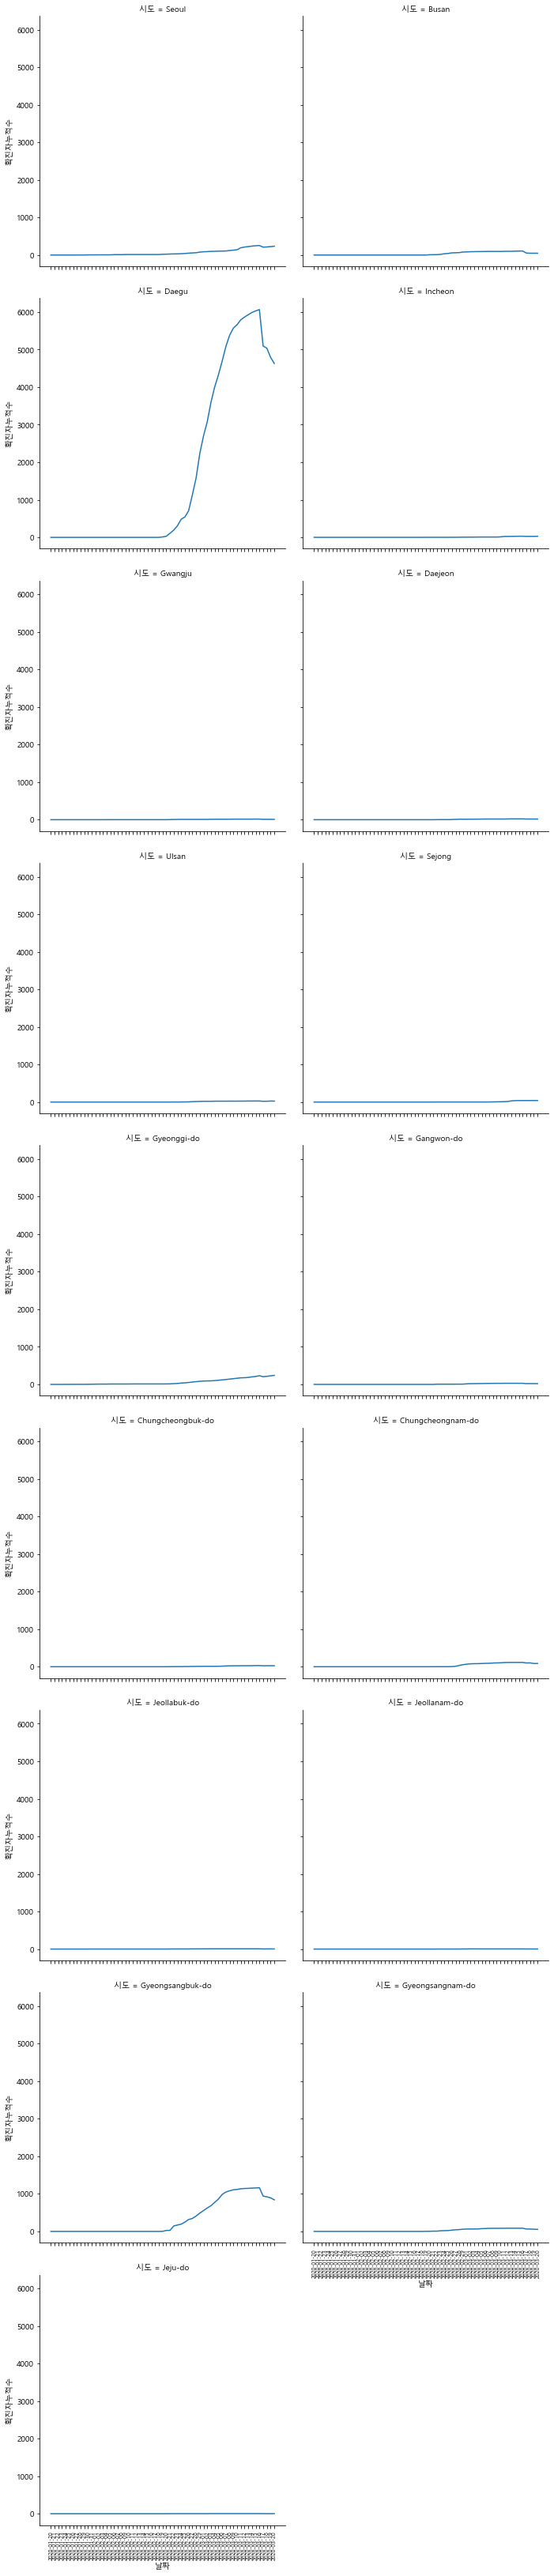

In [54]:
# 시도별로 날짜가 지남에 따른 확진자 수 추이 그래프 line그래프로 그려보기 
g = sns.relplot(data=timeprovince, x='날짜', y='확진자누적수', kind='line', col='시도', col_wrap=2, sizes=(17,5))
g.set_xticklabels(rotation=90, size=7) # figure 사이즈 조정하기..

In [55]:
# timegender 데이터프레임 정보보기
timegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       38 non-null     object
 1   time       38 non-null     int64 
 2   sex        38 non-null     object
 3   confirmed  38 non-null     int64 
 4   deceased   38 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [56]:
timegender.shape

(38, 5)

In [57]:
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [58]:
timegender.tail()

,date,time,sex,confirmed,deceased
33,2020-03-18,0,female,5173,39
34,2020-03-19,0,male,3296,49
35,2020-03-19,0,female,5269,42
36,2020-03-20,0,male,3330,51
37,2020-03-20,0,female,5322,43


In [59]:
# 해당 데이터프레임 칼럼명 한국어로 변경
timegender.columns = ['날짜','시간','성별','확진자누적수','사망자누적수']

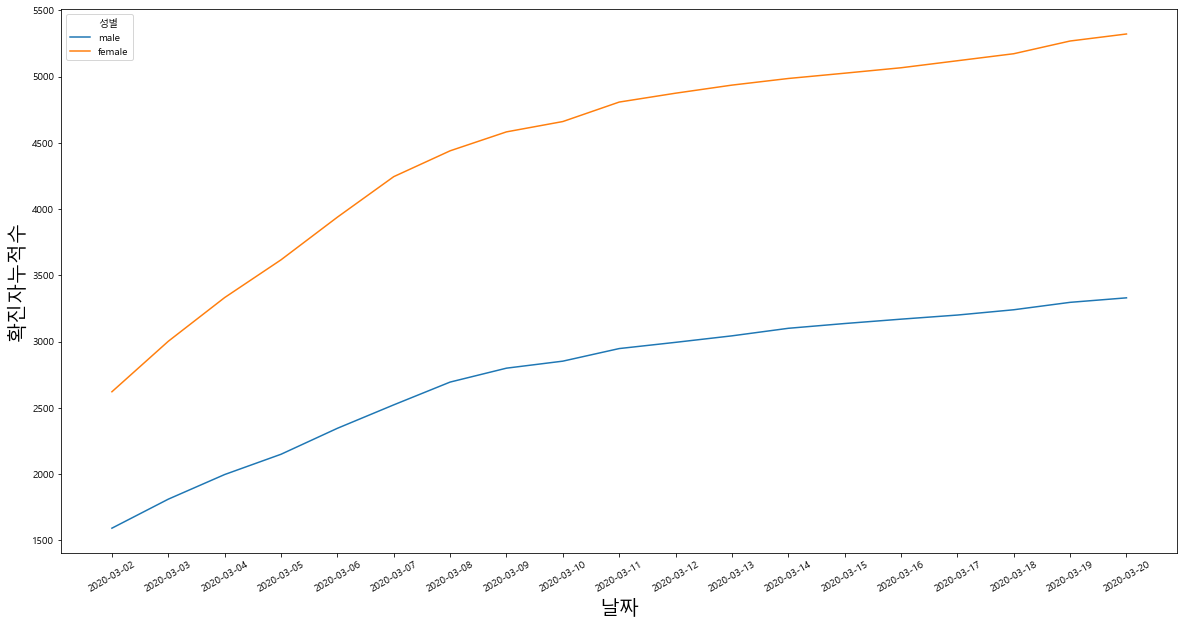

In [60]:
# 성별에 따른 시간이 지남에 따라 확진자 누적수 추이 그래프 그리기

plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
plt.xlabel('날짜',fontsize=20)
plt.ylabel('확진자누적수',fontsize=20)
sns.lineplot(data=timegender, x='날짜', y='확진자누적수', hue='성별')

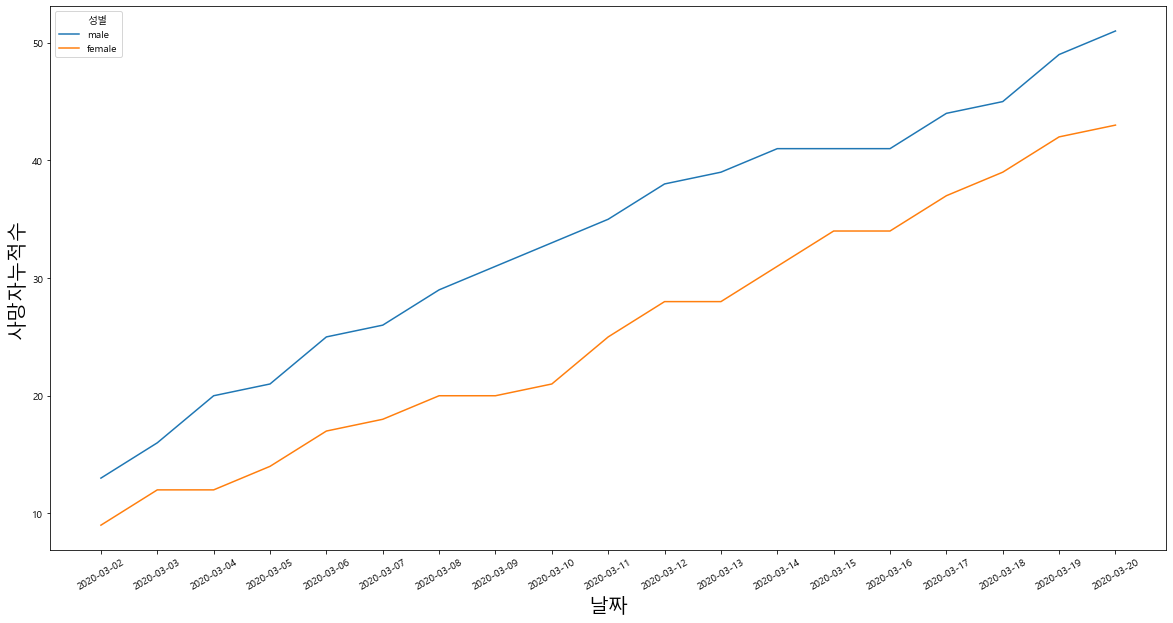

In [86]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
plt.xlabel('날짜',fontsize=20)
plt.ylabel('사망자누적수',fontsize=20)
sns.lineplot(data=timegender, x='날짜', y='사망자누적수', hue='성별')

In [61]:
# patientinfo 데이터프레임 행과열 몇개인지 보기
patientinfo.shape

(2218, 18)

In [62]:
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [63]:
# 해당 데이터프레임 결측치 확인
patientinfo.isnull().sum()

patient_id               0
global_num             904
sex                    145
birth_year             454
age                    261
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
dtype: int64

In [64]:
# 해당 데이터프레임 미리보기
patientinfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [65]:
# 원본데이터 변경을 막기 위해 data변수에 복사하기
data = patientinfo.copy()

In [66]:
# contact_number(접촉자숫자) 평균값, 분산, 최솟값, 최댓값, 사분위수 보기
data['contact_number'].describe()

count     411.000000
mean       24.128954
std        91.087792
min         0.000000
25%         2.000000
50%         5.000000
75%        16.000000
max      1160.000000
Name: contact_number, dtype: float64

In [67]:
# contatct_number 의 결측치값 0으로 대체
data['contact_number'] = data['contact_number'].fillna(0)
# 결측치 0으로 대체됬는지 확인
data['contact_number'].isnull().sum()

0

In [68]:
# contact_number이 16이상인 행들만 갖고와서 df_infection 변수에 넣기
df_infection = data.loc[data['contact_number'] >= 16].reset_index(drop=True)
df_infection.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
4,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released


In [69]:
# 해당 데이터프레임 칼럼 종류 보기
df_infection.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [70]:
# 필요한 칼럼 선별해서 해당 칼럼들만 모두 갖고오기
columns = ['sex','age','country','province','city','infection_case','contact_number','confirmed_date','released_date']
df_infection = df_infection.loc[:,columns]
# 해당 칼럼들 '영어' -> '한국어'로 바꾸기
df_infection.columns = ['성별','연령','국적','시도','구군','감염장소','접촉자수','확진날짜','퇴원날짜']
df_infection.head()

,성별,연령,국적,시도,구군,감염장소,접촉자수,확진날짜,퇴원날짜
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75.0,2020-01-23,2020-02-05
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31.0,2020-01-30,2020-03-02
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17.0,2020-01-30,2020-02-19
3,female,50s,Korea,Seoul,Jongno-gu,contact with patient,43.0,2020-01-31,2020-02-19
4,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,68.0,2020-02-05,2020-02-21


In [71]:
# 연령 값 종류 보기
df_infection['연령'].unique()

array(['50s', '30s', '80s', '60s', '10s', '20s', '40s', '70s', nan],
      dtype=object)

In [72]:
# 연령 값 결측치 unknown으로 대체
# 연령이 unknown인 행들갖고오기 -> 2명뿐이라 영향 별로 없을 것으로 예상
df_infection['연령'] = df_infection['연령'].fillna('unknown')
df_infection.loc[df_infection['연령'] == 'unknown']

,성별,연령,국적,시도,구군,감염장소,접촉자수,확진날짜,퇴원날짜
100,male,unknown,Korea,Gyeongsangbuk-do,Gunwi-gun,Shincheonji Church,16.0,2020-02-22,NaN
101,female,unknown,Korea,Gyeongsangbuk-do,Gunwi-gun,Shincheonji Church,31.0,2020-02-24,NaN


In [73]:
# 연령이 unknown이 값인 행 빼고 모두 가져오기
df_infection = df_infection.loc[df_infection['연령'].str.contains('10s|20s|30s|40s|50s|60s|70s')]
df_infection['연령'].unique()

array(['50s', '30s', '60s', '10s', '20s', '40s', '70s'], dtype=object)

In [74]:
# 연령 값 '이상~미만'으로 된 문자열로 바꿔주기
df_infection.loc[df_infection['연령'] == '10s', '연령'] = '10세이상 20세미만'
df_infection.loc[df_infection['연령'] == '20s', '연령'] = '20세이상 30세미만'
df_infection.loc[df_infection['연령'] == '30s', '연령'] = '30세이상 40세미만'
df_infection.loc[df_infection['연령'] == '40s', '연령'] = '40세이상 50세미만'
df_infection.loc[df_infection['연령'] == '50s', '연령'] = '50세이상 60세미만'
df_infection.loc[df_infection['연령'] == '60s', '연령'] = '60세이상 70세미만'
df_infection.loc[df_infection['연령'] == '70s', '연령'] = '70세이상 80세미만'
df_infection.loc[df_infection['연령'] == '80s', '연령'] = '80세이상'


In [75]:
# 바뀌었는지 확인
df_infection['연령'].unique()

array(['50세이상 60세미만', '30세이상 40세미만', '60세이상 70세미만', '10세이상 20세미만',
       '20세이상 30세미만', '40세이상 50세미만', '70세이상 80세미만'], dtype=object)

In [76]:
# 다시 데이터프레임 미리보기
df_infection.head()

,성별,연령,국적,시도,구군,감염장소,접촉자수,확진날짜,퇴원날짜
0,male,50세이상 60세미만,Korea,Seoul,Gangseo-gu,overseas inflow,75.0,2020-01-23,2020-02-05
1,male,30세이상 40세미만,Korea,Seoul,Jungnang-gu,overseas inflow,31.0,2020-01-30,2020-03-02
2,male,50세이상 60세미만,Korea,Seoul,Jongno-gu,contact with patient,17.0,2020-01-30,2020-02-19
3,female,50세이상 60세미만,Korea,Seoul,Jongno-gu,contact with patient,43.0,2020-01-31,2020-02-19
4,male,30세이상 40세미만,Korea,Seoul,Songpa-gu,overseas inflow,68.0,2020-02-05,2020-02-21


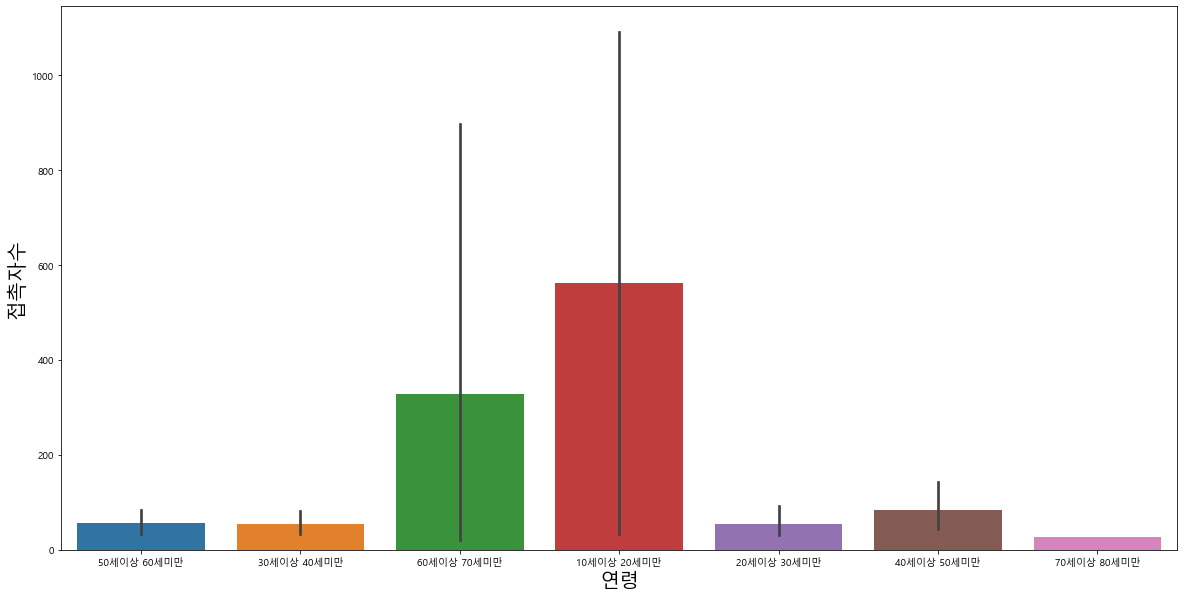

In [77]:
# 연령별 접촉자수 막대그래프 그려보기

plt.figure(figsize=(20,10))
plt.xlabel('연령', fontsize=20)
plt.ylabel('접촉자수', fontsize=20)
sns.barplot(data=df_infection, x='연령', y='접촉자수')

In [78]:
# patientroute 데이터프레임 이름이 너무 길어서 간단하게 df_route로 재할당 하고 미리보기
df_route = patientroute.copy()
df_route.head()

,patient_id,global_num,date,province,city,latitude,longitude
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680


In [79]:
# 해당 데이터프레임 정보보기
df_route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  175 non-null    int64  
 1   global_num  175 non-null    int64  
 2   date        175 non-null    object 
 3   province    175 non-null    object 
 4   city        175 non-null    object 
 5   latitude    175 non-null    float64
 6   longitude   175 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 9.7+ KB


In [80]:
df_route.shape

(175, 7)

In [81]:
# 해당 데이터프레임 결측치 확인 -> 결측치 없음!
df_route.isnull().sum()

patient_id    0
global_num    0
date          0
province      0
city          0
latitude      0
longitude     0
dtype: int64

In [82]:
# 칼럼명 한국어로 바꿔주기
df_route.columns = ['환자번호','global_num','날짜','시도','구군','위도','경도']
df_route.head()

,환자번호,global_num,날짜,시도,구군,위도,경도
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680


In [83]:
# value_counts로 가장 많이 돌아다닌 환자 순으로 '환자번호' 정렬
# 정렬 후 상위 4명의 동선 지도에 표시하기 위함

df_route['환자번호'].value_counts()

1000000013    29
2000000003    18
2000000006    15
1000000014    11
1000000009    10
1000000002     9
2000000001     9
1200000031     8
5000000001     6
1000000011     5
2000000008     5
2000000004     4
2000000002     4
2000000007     4
2000000010     4
2000000005     3
1300000001     3
1000000003     3
2000000009     3
1000000010     3
1000000001     2
1000000004     2
1000000007     2
1000000006     2
1400000001     2
1000000012     2
5100000001     2
1300000002     2
1000000008     1
1000000005     1
2000000011     1
Name: 환자번호, dtype: int64

In [84]:
# 환자번호 데이터타입 문자열로 바꾸기
df_route['환자번호'] = df_route['환자번호'].astype(str)
df_route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   환자번호        175 non-null    object 
 1   global_num  175 non-null    int64  
 2   날짜          175 non-null    object 
 3   시도          175 non-null    object 
 4   구군          175 non-null    object 
 5   위도          175 non-null    float64
 6   경도          175 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.7+ KB


In [85]:
# 가장 많이 돌아다닌 확진자 상위 4명 환자번호 id 메모
'''
1000000013    29
2000000003    18
2000000006    15
1000000014    11
'''

'\n1000000013    29\n2000000003    18\n2000000006    15\n1000000014    11\n'

In [86]:
# 환자번호 상위 4명이 들어있는 행들만 출력
df_route_many = df_route.loc[df_route['환자번호'].str.contains('1000000013|2000000003|2000000006|1000000014')]
df_route_many['환자번호'].unique()

array(['2000000003', '2000000006', '1000000013', '1000000014'],
      dtype=object)

In [87]:
# 가장 많이(1위) 돌아다닌 확진자 행만 출력해 새로 데이터프레임 생성
df_route_max = df_route_many.loc[df_route_many['환자번호'] == '1000000013']
df_route_max = df_route_max.reset_index(drop=True)
df_route_max.head()

,환자번호,global_num,날짜,시도,구군,위도,경도
0,1000000013,29,2020-02-04,Seoul,Jung-gu,37.573067,127.015951
1,1000000013,29,2020-02-04,Seoul,Dongdaemun-gu,37.575981,127.024678
2,1000000013,29,2020-02-04,Seoul,Dongdaemun-gu,37.575981,127.024678
3,1000000013,29,2020-02-04,Seoul,Jongno-gu,37.573067,127.015951
4,1000000013,29,2020-02-05,Seoul,Jongno-gu,37.571721,127.010896


In [88]:
# 지도에 표시하기 위해 folium 라이브러리 import 그리고 geo_df에 가장많이 돌아다닌 확진자 정보 데이터프레임 할당
import folium
geo_df = df_route_max

In [89]:
# 경로를 표현하기 위해서 [ (위도1, 경도1), (위도2, 경도2), ...] 처럼 리스트안에 다중 튜플 구조를 만들기 위해서 테스트 코딩
lists = []
for n in geo_df.index:
    
    points = (geo_df.loc[n, '위도'], geo_df.loc[n, '경도'])
    lists.append(points)
print(lists)

[(37.573067, 127.015951), (37.575981, 127.02467800000001), (37.575981, 127.02467800000001), (37.573067, 127.015951), (37.571721000000004, 127.010896), (37.759448, 127.04216699999999), (37.759448, 127.04216699999999), (37.571721000000004, 127.010896), (37.575739, 127.015399), (37.572390000000006, 127.013899), (37.572596000000004, 127.01527), (37.575739, 127.015399), (37.948023, 127.061052), (37.572596000000004, 127.01527), (37.573326, 127.01531100000001), (37.572596000000004, 127.01527), (37.572390000000006, 127.013899), (37.575879, 127.024495), (37.843309000000005, 127.061543), (37.843309000000005, 127.061543), (37.572925, 127.015772), (37.572596000000004, 127.01527), (37.572596000000004, 127.01527), (37.573326, 127.01531100000001), (37.579471000000005, 127.015224), (37.617076000000004, 127.091603), (37.572596000000004, 127.01527), (37.587055, 127.02683), (37.579678, 126.99894499999999)]


In [91]:
# folium 라이브러리를 이용해서 가장많이 돌아다닌(1위) 확진자 동선 지도에 표시

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=11)

for n in geo_df.index:
    
    #pop_name = geo_df[n, '시도']+","+geo_df[n, '구군']  -> key error 뜸
    
                                                                        #popup인자에 한번에 넣으니까 key error 디버깅
    folium.Marker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],popup=geo_df.loc[n, '날짜']+" : "+
                 geo_df.loc[n, '시도']+","+geo_df.loc[n, '구군']).add_to(map)
    
lists = []
for n in geo_df.index:
    points = (geo_df.loc[n, '위도'], geo_df.loc[n, '경도'])
    lists.append(points)
    
folium.PolyLine(lists).add_to(map)
    
    

map

In [92]:
# 이번엔 2번째로 가장 많이 돌아다닌 확진자 행만 추출해 새로운 데이터프레임에 할당

df_route_2nd = df_route_many.loc[df_route_many['환자번호'] == '2000000003']
df_route_2nd = df_route_2nd.reset_index(drop=True)
df_route_2nd.head()

,환자번호,global_num,날짜,시도,구군,위도,경도
0,2000000003,12,2020-01-19,Gyeonggi-do,Gimpo-si,37.563581,126.802056
1,2000000003,12,2020-01-20,Gyeonggi-do,Bucheon-si,37.486112,126.781023
2,2000000003,12,2020-01-21,Incheon,Jung-gu,37.463100,126.631371
3,2000000003,12,2020-01-22,Seoul,Jung-gu,37.555062,126.970618
4,2000000003,12,2020-01-22,Gangwon-do,Gangneung-si,37.764239,128.899265


In [93]:
# folium 라이브러리를 이용해서 2번째로 가장많이 돌아다닌 확진자 동선 지도에 표시

geo_df = df_route_2nd

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=9)

for n in geo_df.index:
    
    #pop_name = geo_df[n, '시도']+","+geo_df[n, '구군']  -> key error 뜸
    
                                                                        #popup인자에 한번에 넣으니까 key error 디버깅
    folium.Marker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],popup=geo_df.loc[n, '날짜']+" : "+
                 geo_df.loc[n, '시도']+","+geo_df.loc[n, '구군']).add_to(map)
    
lists = []
for n in geo_df.index:
    points = (geo_df.loc[n, '위도'], geo_df.loc[n, '경도'])
    lists.append(points)
    # points 자료구조형태는 a list of tuples : [ (1,2), (2,3) ... ]
folium.PolyLine(lists, color='red').add_to(map)
    
    

map

In [94]:
# 이번엔 3번째로 가장 많이 돌아다닌 확진자 행만 추출해 새로운 데이터프레임에 할당

df_route_3rd = df_route_many.loc[df_route_many['환자번호'] == '2000000006'].reset_index(drop=True)
df_route_3rd.head()

,환자번호,global_num,날짜,시도,구군,위도,경도
0,2000000006,17,2020-01-24,Incheon,Jung-gu,37.460459,126.440680
1,2000000006,17,2020-01-24,Seoul,Jung-gu,37.555877,126.969728
2,2000000006,17,2020-01-24,Daegu,Dong-gu,35.879893,128.628476
3,2000000006,17,2020-01-24,Daegu,Suseong-gu,35.858160,128.630540
4,2000000006,17,2020-01-25,Daegu,Buk-gu,35.885552,128.582882


In [95]:
# folium 라이브러리를 이용해서 3번째로 가장많이 돌아다닌 확진자 동선 지도에 표시

geo_df = df_route_3rd 

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=8)

for n in geo_df.index:
    
    #pop_name = geo_df[n, '시도']+","+geo_df[n, '구군']  -> key error 뜸
    
                                                                        #popup인자에 한번에 넣으니까 key error 디버깅
    folium.Marker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],popup=geo_df.loc[n, '날짜']+" : "+
                 geo_df.loc[n, '시도']+","+geo_df.loc[n, '구군']).add_to(map)
    
lists = []
for n in geo_df.index:
    points = (geo_df.loc[n, '위도'], geo_df.loc[n, '경도'])
    lists.append(points)
    # points 자료구조형태는 a list of tuples : [ (1,2), (2,3) ... ]
folium.PolyLine(lists, color='green').add_to(map)
    
    

map

In [96]:
# 이번엔 4번째로 가장 많이 돌아다닌 확진자 행만 추출해 새로운 데이터프레임에 할당

df_route_4th = df_route_many.loc[df_route_many['환자번호'] == '1000000014'].reset_index(drop=True)
df_route_4th.head()

,환자번호,global_num,날짜,시도,구군,위도,경도
0,1000000014,30,2020-02-08,Seoul,Jongno-gu,37.579541,126.999305
1,1000000014,30,2020-02-10,Seoul,Jongno-gu,37.572596,127.015270
2,1000000014,30,2020-02-10,Incheon,Jung-gu,37.423537,126.421426
3,1000000014,30,2020-02-10,Incheon,Seo-gu,37.570719,126.675649
4,1000000014,30,2020-02-10,Seoul,Jongno-gu,37.574541,127.015927


In [97]:
# folium 라이브러리를 이용해서 4번째로 가장많이 돌아다닌 확진자 동선 지도에 표시

geo_df = df_route_4th

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=10)

for n in geo_df.index:
    
    #pop_name = geo_df[n, '시도']+","+geo_df[n, '구군']  -> key error 뜸
    
                                                                        #popup인자에 한번에 넣으니까 key error 디버깅
    folium.Marker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],popup=geo_df.loc[n, '날짜']+" : "+
                 geo_df.loc[n, '시도']+","+geo_df.loc[n, '구군']).add_to(map)
    
lists = []
for n in geo_df.index:
    points = (geo_df.loc[n, '위도'], geo_df.loc[n, '경도'])
    lists.append(points)
    # points 자료구조형태는 a list of tuples : [ (1,2), (2,3) ... ]
folium.PolyLine(lists, color='orange').add_to(map)

map

In [98]:
# 이번에는 가장 많이 돌아다닌 확진자들 (1위 ~ 4위)까지 한번에 동선을 지도에 표시

In [100]:
# 1위~4위까지 모두 들어있는 데이터프레임 geo_df에 할당
geo_df = df_route_many

In [101]:
# map에서 1~4위가 모두 들어있는 데이터프레임의 위도,경도의 평균값을 이용해서 전체적인 지도의 중심값 설정
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=8)

for n in geo_df.index:
    # 1위~4위 각각 동선 색깔별로 표시 (1위:파란색, 2위:빨간색, 3위:초록색, 4위:오렌지색)
    if geo_df.loc[n, '환자번호'] == '1000000013':
        icon_color = 'blue'
    elif geo_df.loc[n, '환자번호'] == '2000000003':
        icon_color = 'red'
    elif geo_df.loc[n, '환자번호'] == '2000000006':
        icon_color = 'green'
    else:
        icon_color = 'orange'
    
    folium.CircleMarker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                 popup="환자번호 :"+geo_df.loc[n, '환자번호']+" - 날짜:"+geo_df.loc[n, '날짜']+' 시도 :'+geo_df.loc[n, '시도']+
                        " 구군 :"+geo_df.loc[n, '구군'], color=icon_color, fill_color=icon_color, fill=True,
                       radius=9).add_to(map)

    
# 1위~4위까지 각각 동선 line을 그리기 위해 이전에 작업했던 1위, 2위, 3위, 4위 각각의 데이터프레임에서 위도, 경도 따오기
lists1 = []
for n in df_route_max.index:
    points = (df_route_max.loc[n, '위도'], df_route_max.loc[n, '경도'])
    lists1.append(points)
    # points 자료구조형태는 a list of tuples : [ (1,2), (2,3) ... ]
folium.PolyLine(lists1, color='blue').add_to(map)

lists2 = []
for n in df_route_2nd.index:
    points = (df_route_2nd.loc[n, '위도'], df_route_2nd.loc[n, '경도'])
    lists2.append(points)
    
folium.PolyLine(lists2, color='red').add_to(map)

lists3 = []
for n in df_route_3rd.index:
    points = (df_route_3rd.loc[n, '위도'], df_route_3rd.loc[n, '경도'])
    lists3.append(points)

folium.PolyLine(lists3, color='green').add_to(map)

lists4 = []
for n in df_route_4th.index:
    points = (df_route_4th.loc[n, '위도'], df_route_4th.loc[n, '경도'])
    lists4.append(points)

folium.PolyLine(lists4, color='orange').add_to(map)

# 현재 주피터노트북 출력화면에서 popup 문자가 깨지지만 hmtl파일로 저장하면 안깨지므로 따로 저장
map.save('korean_encoding.html')
map

## 2020-03-30일 까지 업데이트된 데이터로 다시 분석

In [5]:
region = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Region2.csv")
timeprovince = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeProvince2.csv")
timegender = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeGender2.csv")
timeage = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeAge2.csv")
time = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Time2.csv")
patientinfo = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientInfo2.csv")
patientroute = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientRoute2.csv")
case = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Case2.csv")
weather = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Weather2.csv")

In [7]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [8]:
region.shape

(244, 12)

In [9]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [10]:
# 칼럼명 이름 바꾸기
region.columns = ['지역코드','시도','구군','위도','경도','초등학교 수','유치원 수','대학교 수','academy_ratio','노인비율',
                 '독거노인비율','요양원 수']
region.head()

,지역코드,시도,구군,위도,경도,초등학교 수,유치원 수,대학교 수,academy_ratio,노인비율,독거노인비율,요양원 수
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [11]:
region['시도'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Korea'], dtype=object)

In [14]:
# 시도별로 노인비율 얼마나 많은지 지도로 표시해보기
sido_df = region.loc[(region['시도'] == region['구군'])]
sido_df.head()

,지역코드,시도,구군,위도,경도,초등학교 수,유치원 수,대학교 수,academy_ratio,노인비율,독거노인비율,요양원 수
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
43,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
52,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
58,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497


In [38]:
import folium
geo_df = sido_df

In [27]:
import json
geo_json = json.load(open("C:/Users/joyh1/Desktop/southkorea-maps-master/kostat/2018/json/skorea-provinces-2018-topo-simple.json", encoding='utf-8'))

In [28]:
geo_json

{'type': 'Topology',
 'bbox': [124.60971767865396,
  33.11235576032225,
  131.87146666639862,
  38.61370930709446],
 'transform': {'scale': [7.261821605960712e-05, 5.501408560857817e-05],
  'translate': [124.60971767865396, 33.11235576032225]},
 'objects': {'skorea_provinces_2018_geo': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[0, 1]],
     'properties': {'name': '서울특별시',
      'base_year': '2018',
      'name_eng': 'Seoul',
      'code': '11'}},
    {'type': 'MultiPolygon',
     'arcs': [[[2, 3]], [[4, 5, 6], [7]]],
     'properties': {'name': '부산광역시',
      'base_year': '2018',
      'name_eng': 'Busan',
      'code': '21'}},
    {'type': 'Polygon',
     'arcs': [[8, 9]],
     'properties': {'name': '대구광역시',
      'base_year': '2018',
      'name_eng': 'Daegu',
      'code': '22'}},
    {'type': 'MultiPolygon',
     'arcs': [[[10]],
      [[11]],
      [[12]],
      [[13]],
      [[-1, 14, 15, 16], [17]],
      [[18]],
      [[19]],
      [[20

In [35]:
geo_json['objects']['skorea_provinces_2018_geo']['geometries'][0]['properties']['name']

'서울특별시'

In [40]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=8)

folium.Choropleth(geo_data=geo_json, name='chropleth', data=geo_df, columns=['시도','노인비율'],
                 key_on='objects.skorea_provinces_2018_geo.geometries.properties.name',
                 fill_color='YlGn',
                 fill_opacity=0.7,
                 line_opacity=0.2,
                 legend_name='시도별 노인비율').add_to(map)
map
    

AttributeError: module 'folium' has no attribute 'Choropleth'